In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt

%run '/kaggle/input/cte-model/CTE.ipynb'
%run '/kaggle/input/cte-model/dataloader_imreshape_change.ipynb'

import numpy as np
import os

torch.Size([1, 105])


In [2]:
class LabelSomCE(nn.Module):
	def __init__(self):
		super().__init__()

	def forward(self,x,target,smoothing=0.1):
		confidence = 1.0 - smoothing
		logprobs = F.log_softmax(x,dim=-1)
		nll_loss = - logprobs.gather(dim=-1,index=target.unsqueeze(1))
		nll_loss = nll_loss.squeeze(1)
		smooth_loss = -logprobs.mean(dim=-1)
		loss = confidence * nll_loss + smoothing * smooth_loss

		return loss.mean()

def download(folder,thetarfile):
    import urllib.request
    import tarfile
    ftpstream = urllib.request.urlopen(thetarfile)
    thetarfile = tarfile.open(fileobj=ftpstream, mode="r|gz")
    thetarfile.extractall(folder)
    thetarfile.close()

def download_cerug(folder):
    local_tarfile = "/CERUG-EN-train-images.tar.gz"
    extract_local_tar(local_tarfile, folder)
    #thetarfile = "https://www.ai.rug.nl/~sheng/writerset/CERUG-EN-train-images.tar.gz"
    #download(folder,thetarfile)
    local_tarfile = "/CERUG-EN-test-images.tar.gz"
    extract_local_tar(local_tarfile, folder)
    #thetarfile = "https://www.ai.rug.nl/~sheng/writerset/CERUG-EN-test-images.tar.gz"
    #download(folder,thetarfile)

def download_firemaker(folder):
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/Firemaker-train-images.tar.gz"
    download(folder,thetarfile)
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/Firemaker-test-images.tar.gz"
    download(folder,thetarfile)


----------
loading dataset CERUG-EN with images: 5702
number of writer is: 105
-*-*-*-*-*-*-*-*-*-*
----------
loading dataset CERUG-EN with images: 5127
number of writer is: 105
-*-*-*-*-*-*-*-*-*-*
Traing epoch: 0   avg loss is: 10.110942337025447
Testing epoch: 0   avg testing loss is: 4.742050923291025
Testing on epoch: 0 has accuracy: top1: 12.81 top5: 38.79


/tmp/ipykernel_24/1593425999.py:132: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Testing on epoch: %d has accuracy: top1: %.2f top5: %.2f'%(epoch,top1*100,top5*100))
/tmp/ipykernel_24/1593425999.py:134: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fp.write('Testing epoch %d accuracy is: top1: %.2f top5: %.2f\n'%(epoch,top1*100,top5*100))


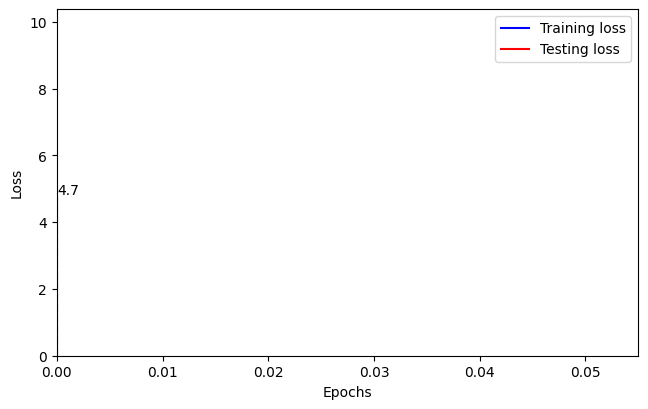

Traing epoch: 1   avg loss is: 6.57636822104788
Testing epoch: 1   avg testing loss is: 4.003376262581608
Testing on epoch: 1 has accuracy: top1: 23.46 top5: 55.76


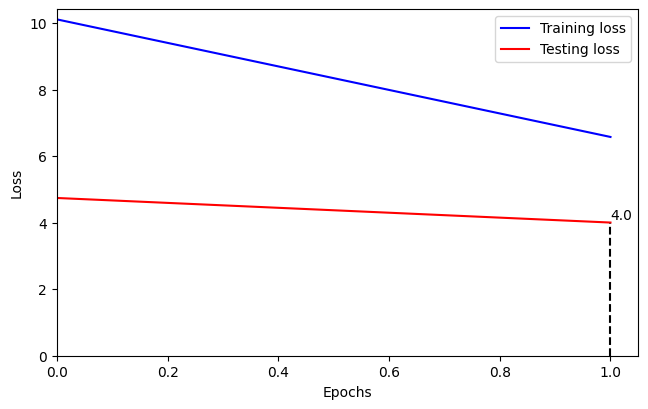

Traing epoch: 2   avg loss is: 5.616316735243597
Testing epoch: 2   avg testing loss is: 3.781611041116566
Testing on epoch: 2 has accuracy: top1: 27.66 top5: 61.50


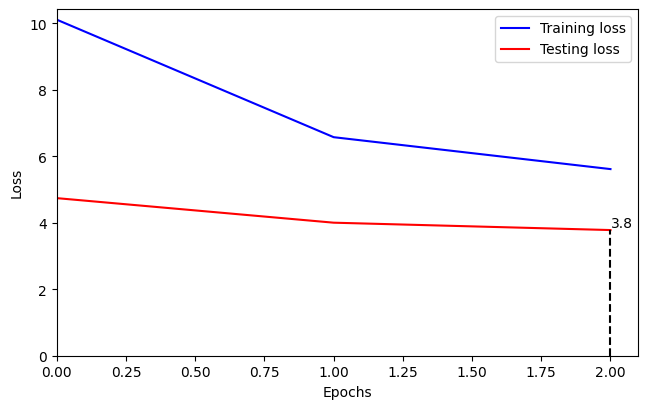

Traing epoch: 3   avg loss is: 4.8399560611788965
Testing epoch: 3   avg testing loss is: 4.0498451183889514
Testing on epoch: 3 has accuracy: top1: 27.56 top5: 66.67


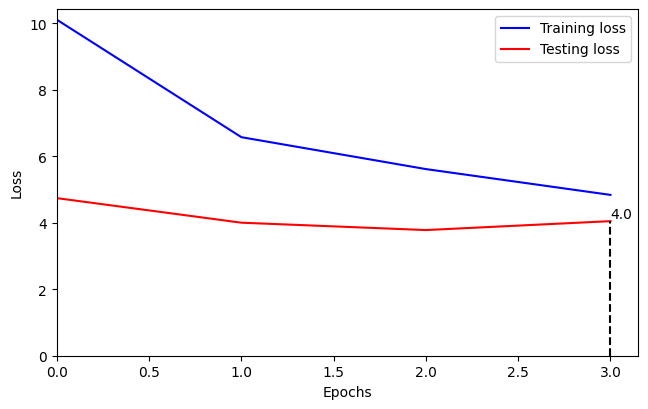

Traing epoch: 4   avg loss is: 4.250968719396939
Testing epoch: 4   avg testing loss is: 3.3584589193171803
Testing on epoch: 4 has accuracy: top1: 34.48 top5: 72.93


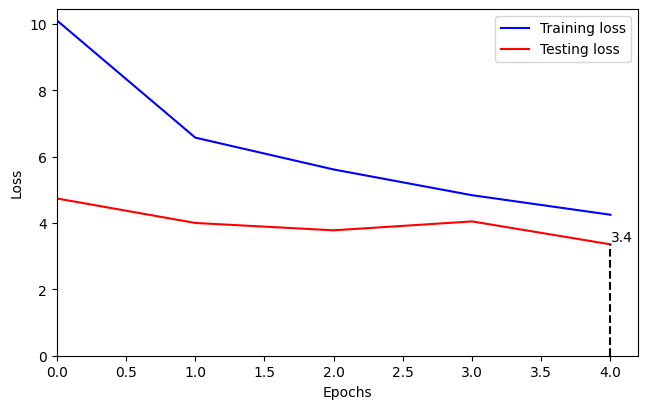

Traing epoch: 5   avg loss is: 3.7371558067845365
Testing epoch: 5   avg testing loss is: 2.8886540548823705
Testing on epoch: 5 has accuracy: top1: 42.68 top5: 80.42


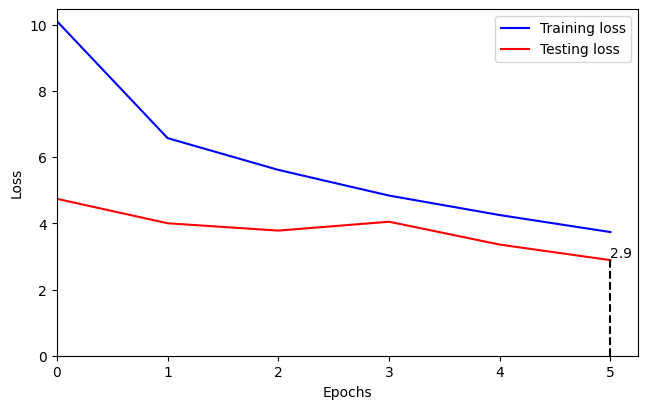

Traing epoch: 6   avg loss is: 3.376642368754753
Testing epoch: 6   avg testing loss is: 3.307017669870846
Testing on epoch: 6 has accuracy: top1: 37.25 top5: 74.96


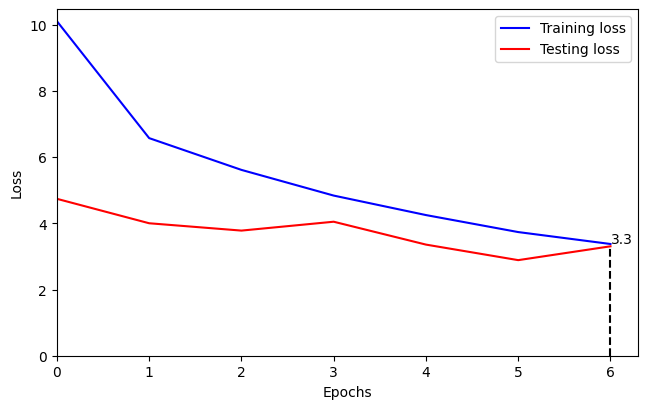

Traing epoch: 7   avg loss is: 2.991325268892347
Testing epoch: 7   avg testing loss is: 2.6208183780266117
Testing on epoch: 7 has accuracy: top1: 51.77 top5: 86.42


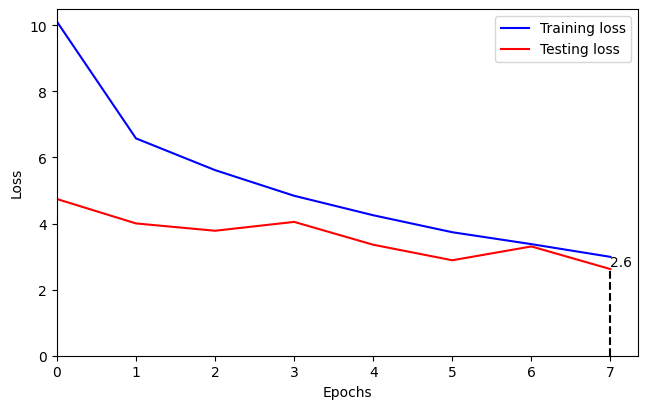

Traing epoch: 8   avg loss is: 2.707070641157006
Testing epoch: 8   avg testing loss is: 2.728853691404111
Testing on epoch: 8 has accuracy: top1: 48.49 top5: 81.80


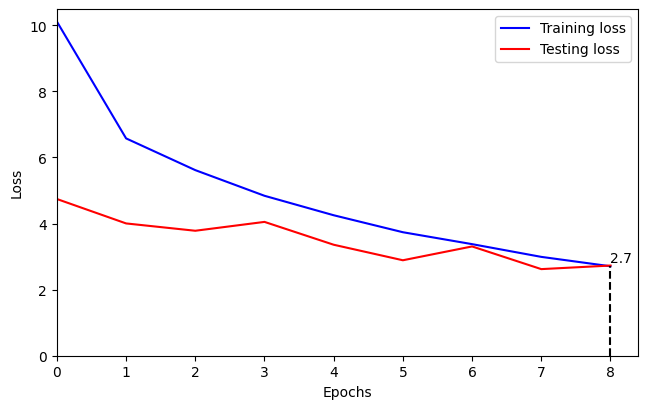

Traing epoch: 9   avg loss is: 2.457830377987453
Testing epoch: 9   avg testing loss is: 3.2806579929274564
Testing on epoch: 9 has accuracy: top1: 41.06 top5: 72.44


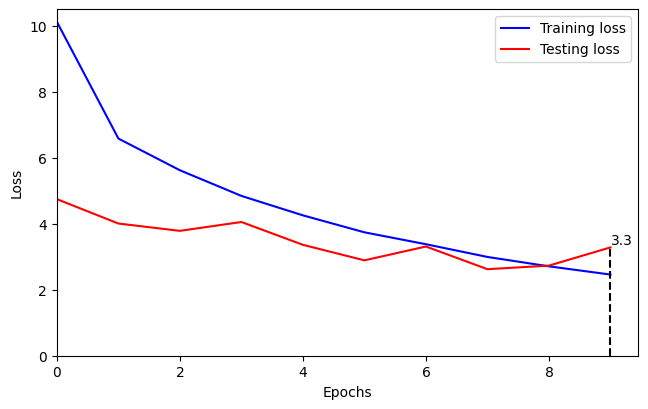

Traing epoch: 10   avg loss is: 1.9847125052070083
Testing epoch: 10   avg testing loss is: 2.3214196196969055
Testing on epoch: 10 has accuracy: top1: 58.14 top5: 89.00


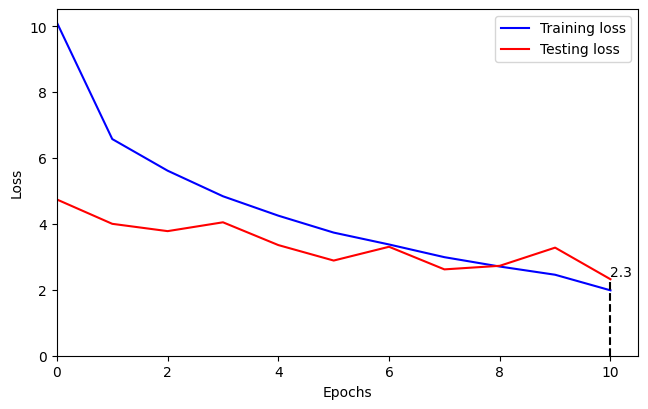

Traing epoch: 11   avg loss is: 1.8426226911758508
Testing epoch: 11   avg testing loss is: 2.1445050960017884
Testing on epoch: 11 has accuracy: top1: 61.15 top5: 89.78


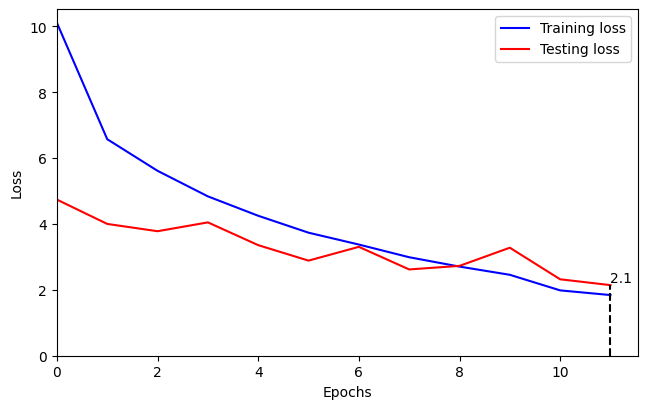

Traing epoch: 12   avg loss is: 1.769225613075812
Testing epoch: 12   avg testing loss is: 1.9279945969952972
Testing on epoch: 12 has accuracy: top1: 68.85 top5: 93.68


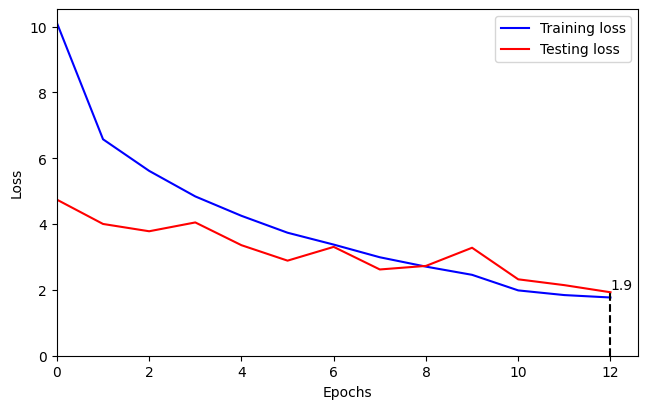

Traing epoch: 13   avg loss is: 1.7240739713529913
Testing epoch: 13   avg testing loss is: 2.1532433426640116
Testing on epoch: 13 has accuracy: top1: 61.67 top5: 90.05


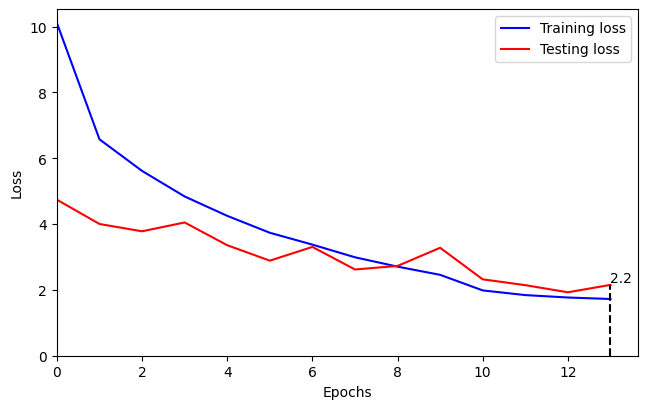

Traing epoch: 14   avg loss is: 1.669480478396269
Testing epoch: 14   avg testing loss is: 2.4174081491904094
Testing on epoch: 14 has accuracy: top1: 55.76 top5: 86.03


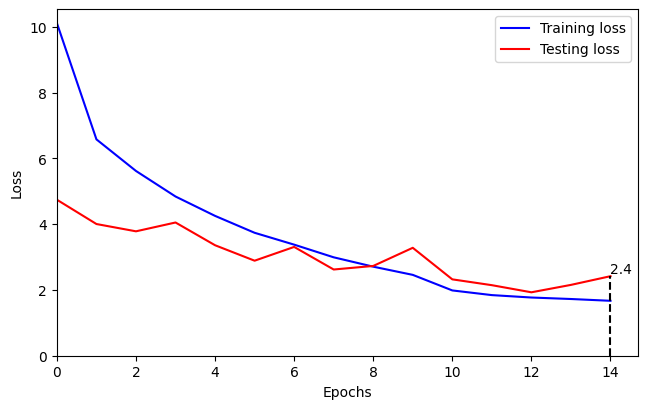

Traing epoch: 15   avg loss is: 1.6214517812435032
Testing epoch: 15   avg testing loss is: 2.0802179931480196
Testing on epoch: 15 has accuracy: top1: 64.83 top5: 90.38


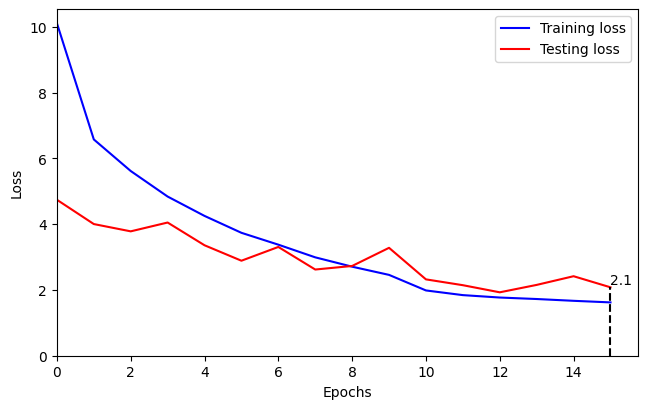

Traing epoch: 16   avg loss is: 1.5836699913863708
Testing epoch: 16   avg testing loss is: 2.2860672262227424
Testing on epoch: 16 has accuracy: top1: 57.73 top5: 86.72


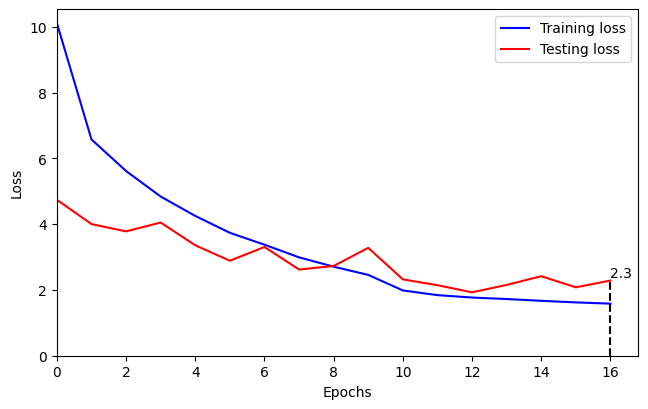

Traing epoch: 17   avg loss is: 1.5035872806687982
Testing epoch: 17   avg testing loss is: 2.0686923696244617
Testing on epoch: 17 has accuracy: top1: 62.73 top5: 91.75


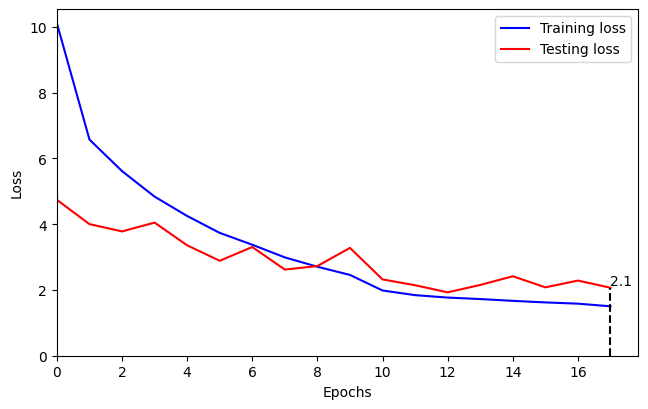

Traing epoch: 18   avg loss is: 1.4849460756077486
Testing epoch: 18   avg testing loss is: 2.0208092805381135
Testing on epoch: 18 has accuracy: top1: 64.66 top5: 91.77


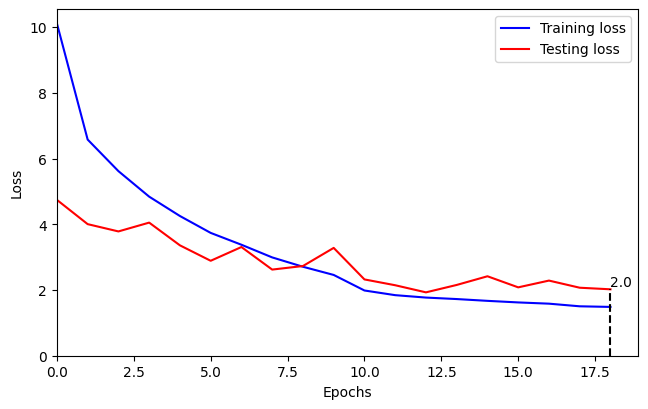

Traing epoch: 19   avg loss is: 1.4618836901768917
Testing epoch: 19   avg testing loss is: 1.7911535661168558
Testing on epoch: 19 has accuracy: top1: 73.55 top5: 93.17


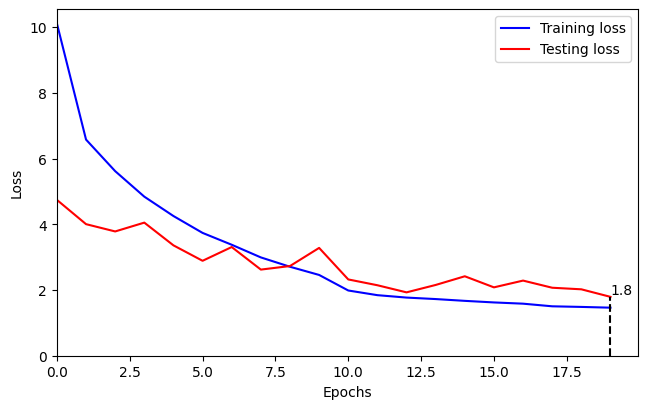

Traing epoch: 20   avg loss is: 1.2973855493449364
Testing epoch: 20   avg testing loss is: 1.7071631378102525
Testing on epoch: 20 has accuracy: top1: 74.29 top5: 94.36


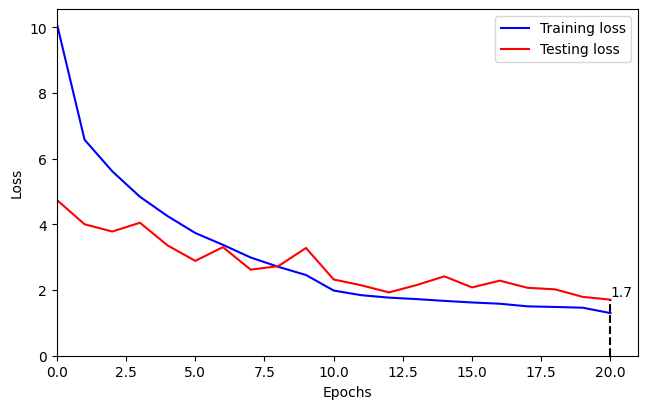

Traing epoch: 21   avg loss is: 1.263941290999661
Testing epoch: 21   avg testing loss is: 1.7823652262999632
Testing on epoch: 21 has accuracy: top1: 72.34 top5: 93.15


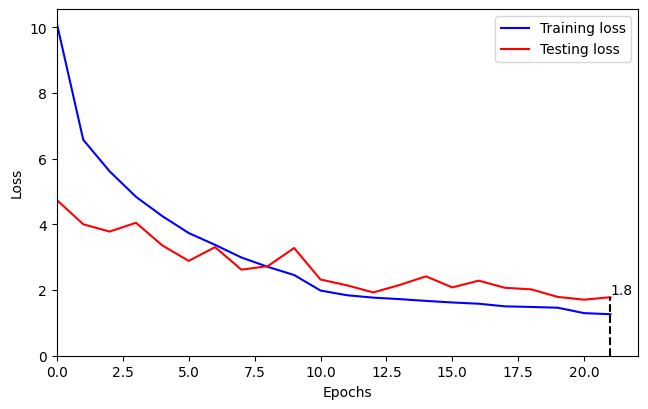

Traing epoch: 22   avg loss is: 1.2323225576336645
Testing epoch: 22   avg testing loss is: 1.7066713170470478
Testing on epoch: 22 has accuracy: top1: 74.72 top5: 94.09


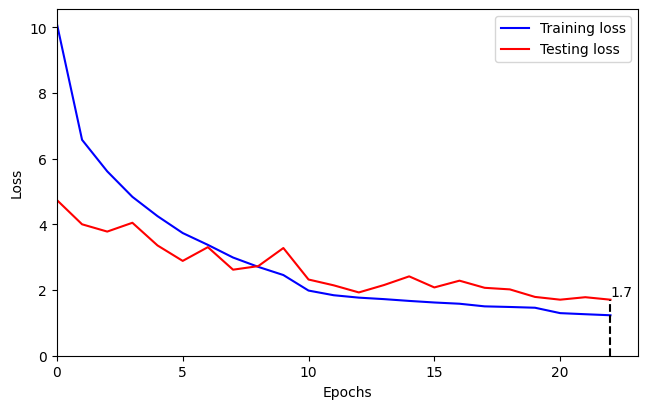

Traing epoch: 23   avg loss is: 1.2194369046294056
Testing epoch: 23   avg testing loss is: 1.6161398493983663
Testing on epoch: 23 has accuracy: top1: 76.75 top5: 95.28


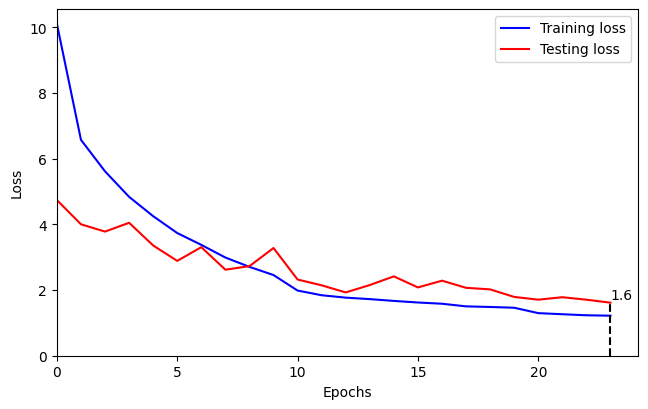

Traing epoch: 24   avg loss is: 1.2048655274201507
Testing epoch: 24   avg testing loss is: 1.7760035627727568
Testing on epoch: 24 has accuracy: top1: 71.46 top5: 93.37


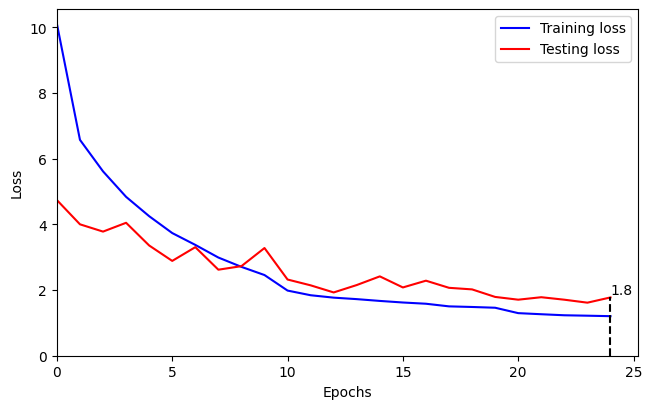

Traing epoch: 25   avg loss is: 1.1903306472869146
Testing epoch: 25   avg testing loss is: 1.660567350105333
Testing on epoch: 25 has accuracy: top1: 76.32 top5: 94.89


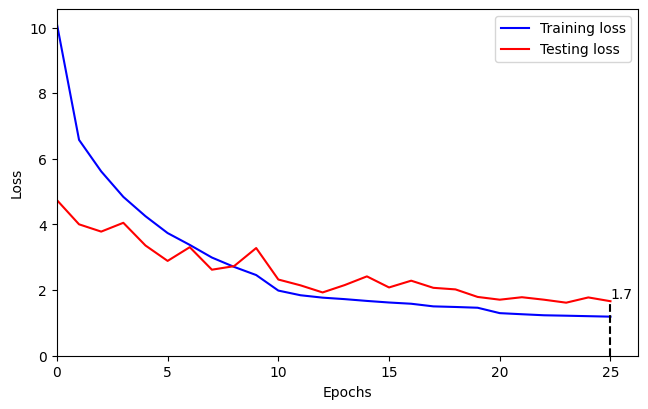

Traing epoch: 26   avg loss is: 1.1659677823384602
Testing epoch: 26   avg testing loss is: 1.6247949663352372
Testing on epoch: 26 has accuracy: top1: 77.12 top5: 94.97


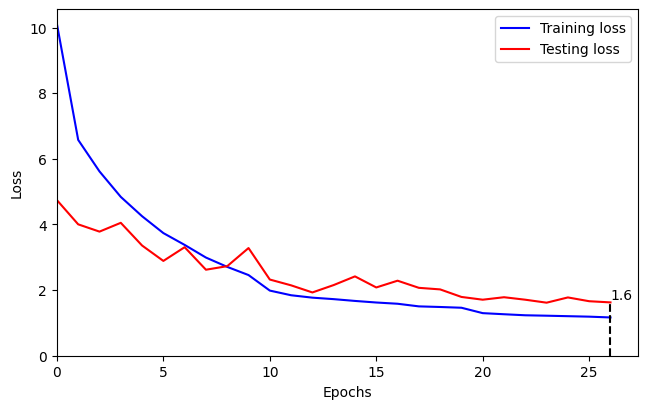

Traing epoch: 27   avg loss is: 1.1635659186779952
Testing epoch: 27   avg testing loss is: 1.901998007780295
Testing on epoch: 27 has accuracy: top1: 67.93 top5: 92.35


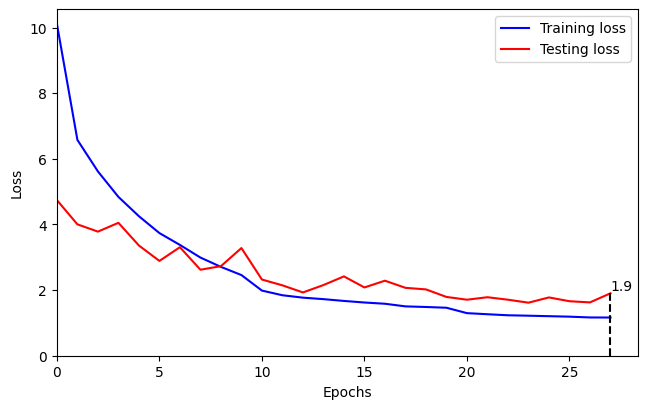

Traing epoch: 28   avg loss is: 1.1581590870181386
Testing epoch: 28   avg testing loss is: 1.598995839323953
Testing on epoch: 28 has accuracy: top1: 78.27 top5: 94.75


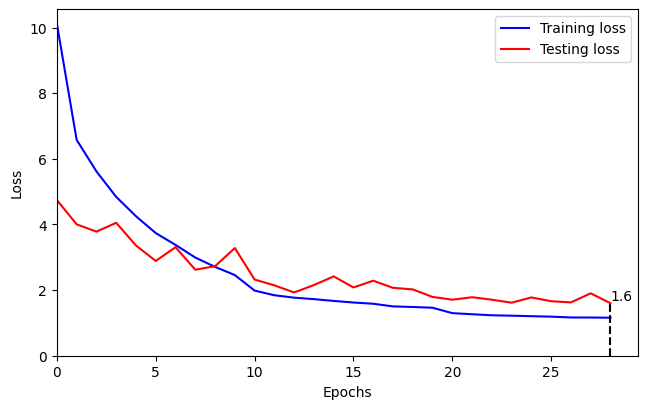

Traing epoch: 29   avg loss is: 1.1366109320429527
Testing epoch: 29   avg testing loss is: 1.5618729227428496
Testing on epoch: 29 has accuracy: top1: 79.62 top5: 95.40


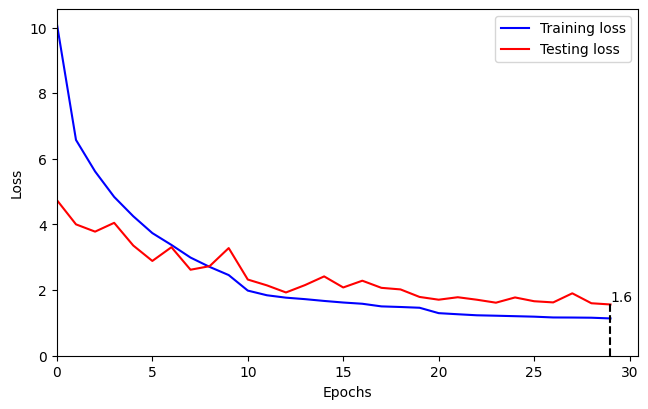

Traing epoch: 30   avg loss is: 1.0749034298902131
Testing epoch: 30   avg testing loss is: 1.4907639479711419
Testing on epoch: 30 has accuracy: top1: 81.53 top5: 96.35


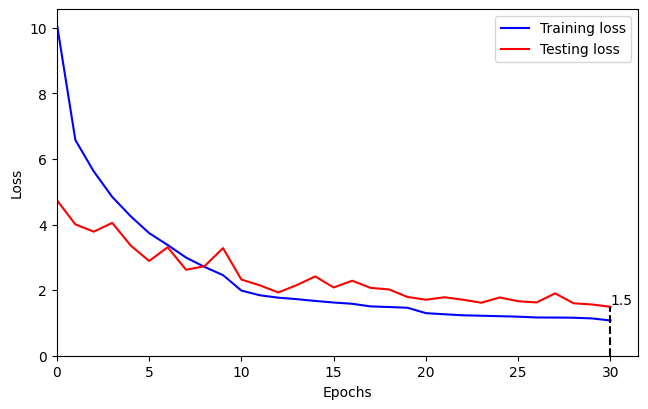

Traing epoch: 31   avg loss is: 1.062711555750764
Testing epoch: 31   avg testing loss is: 1.507684748492137
Testing on epoch: 31 has accuracy: top1: 81.26 top5: 95.98


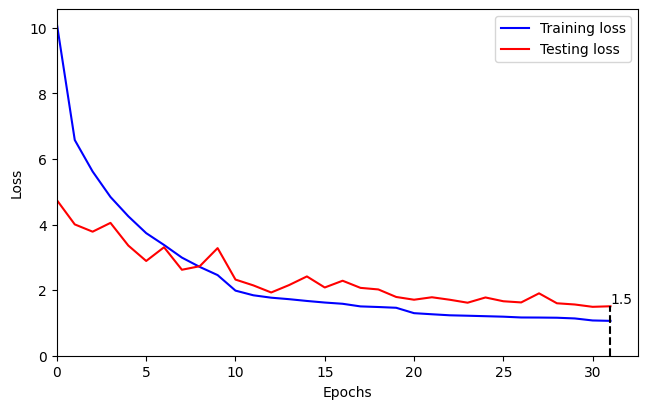

Traing epoch: 32   avg loss is: 1.0578430201493056
Testing epoch: 32   avg testing loss is: 1.5391581344455945
Testing on epoch: 32 has accuracy: top1: 79.34 top5: 95.49


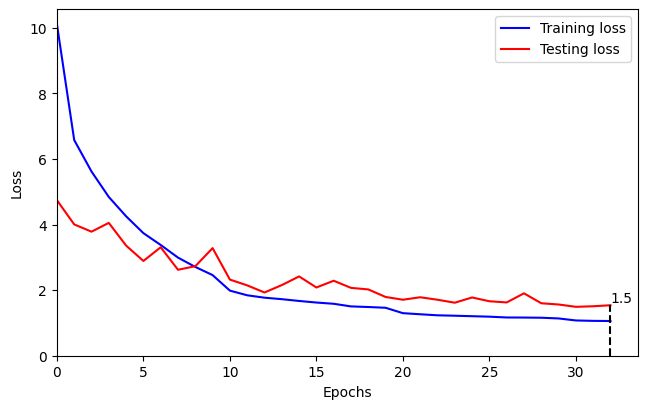

Traing epoch: 33   avg loss is: 1.046967493385828
Testing epoch: 33   avg testing loss is: 1.4748607610244988
Testing on epoch: 33 has accuracy: top1: 81.94 top5: 95.83


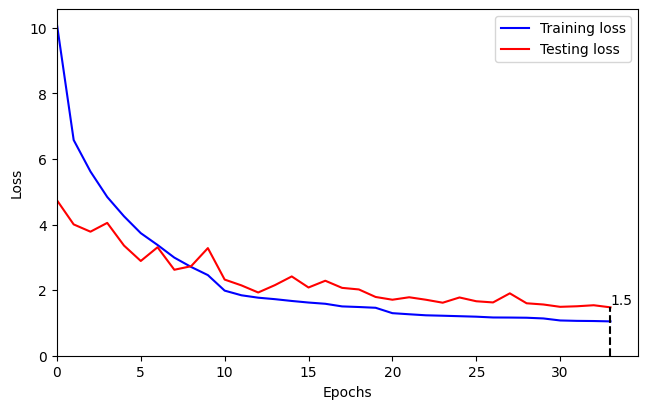

Traing epoch: 34   avg loss is: 1.0405016940514915
Testing epoch: 34   avg testing loss is: 1.5080538223094286
Testing on epoch: 34 has accuracy: top1: 80.53 top5: 95.85


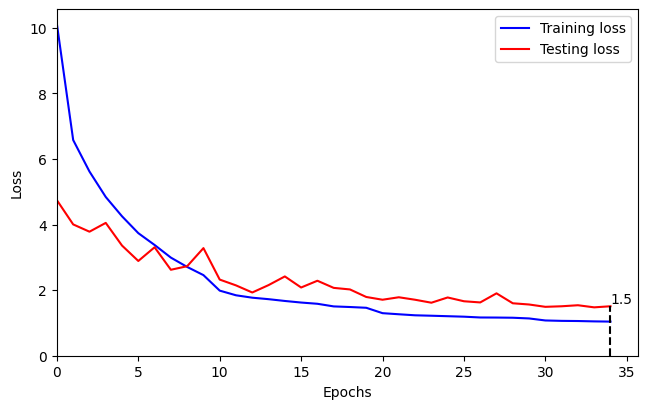

Traing epoch: 35   avg loss is: 1.0348063922729813
Testing epoch: 35   avg testing loss is: 1.508623944264706
Testing on epoch: 35 has accuracy: top1: 80.87 top5: 95.49


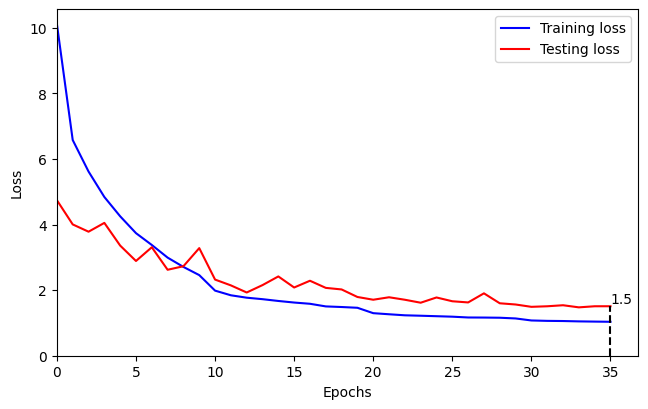

Traing epoch: 36   avg loss is: 1.031805302749495
Testing epoch: 36   avg testing loss is: 1.587958683477384
Testing on epoch: 36 has accuracy: top1: 77.55 top5: 94.60


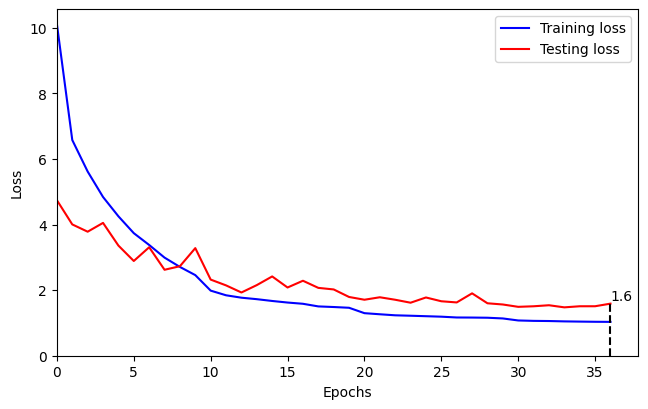

Traing epoch: 37   avg loss is: 1.025137743195232
Testing epoch: 37   avg testing loss is: 1.5293594515212228
Testing on epoch: 37 has accuracy: top1: 79.99 top5: 95.49


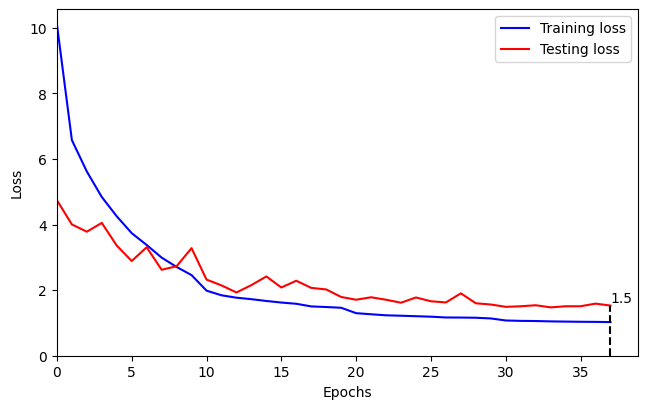

Traing epoch: 38   avg loss is: 1.0186165906801945
Testing epoch: 38   avg testing loss is: 1.5135572580533607
Testing on epoch: 38 has accuracy: top1: 79.97 top5: 95.53


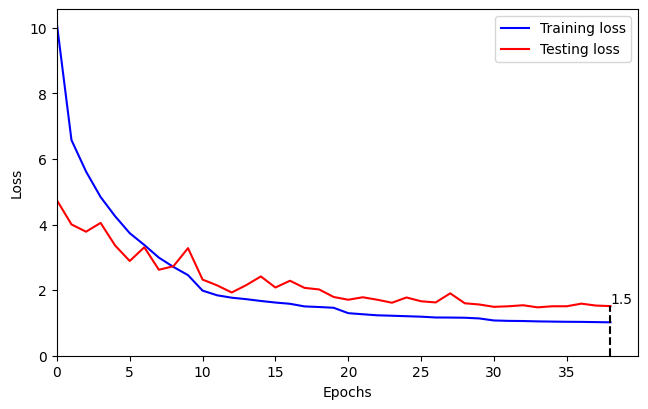

Traing epoch: 39   avg loss is: 1.00974633914082
Testing epoch: 39   avg testing loss is: 1.4850568645097013
Testing on epoch: 39 has accuracy: top1: 80.77 top5: 95.40


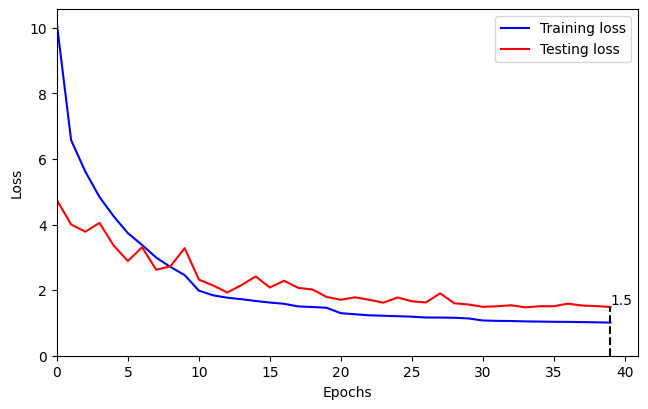

Traing epoch: 40   avg loss is: 0.9955292011843342
Testing epoch: 40   avg testing loss is: 1.4337041656547618
Testing on epoch: 40 has accuracy: top1: 83.23 top5: 96.49


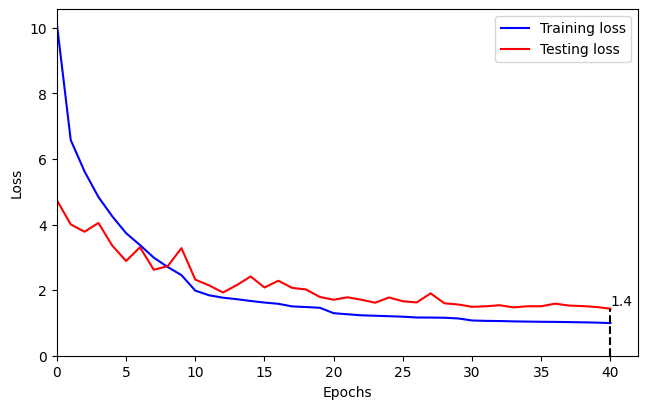

Traing epoch: 41   avg loss is: 0.985263362986033
Testing epoch: 41   avg testing loss is: 1.4769396789348757
Testing on epoch: 41 has accuracy: top1: 81.63 top5: 95.63


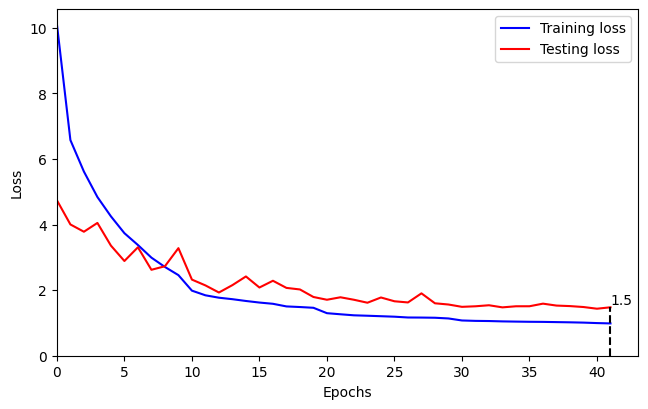

Traing epoch: 42   avg loss is: 0.9825962062309436
Testing epoch: 42   avg testing loss is: 1.4791181566559266
Testing on epoch: 42 has accuracy: top1: 81.33 top5: 95.79


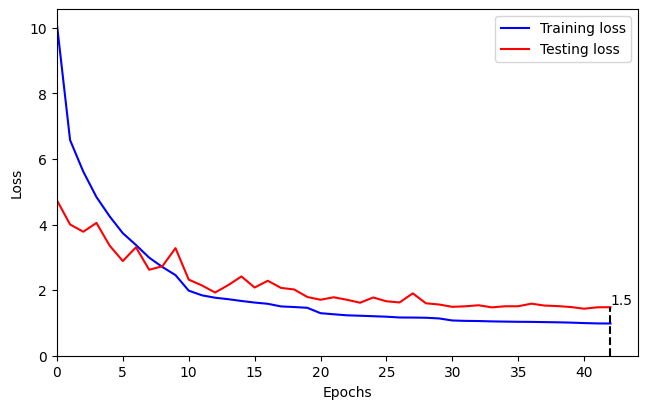

Traing epoch: 43   avg loss is: 0.9804991563829053
Testing epoch: 43   avg testing loss is: 1.443010967654231
Testing on epoch: 43 has accuracy: top1: 82.54 top5: 96.20


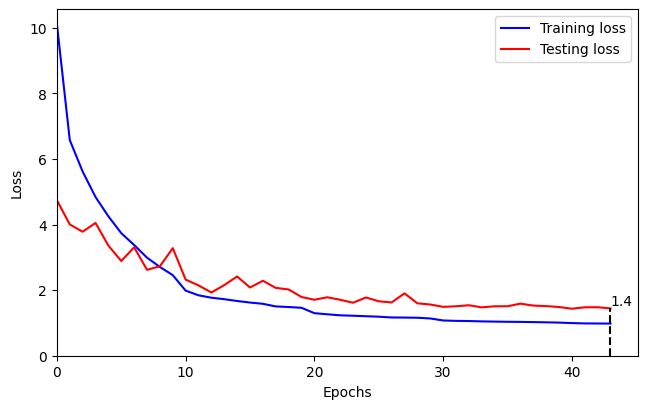

Traing epoch: 44   avg loss is: 0.9812885850083595
Testing epoch: 44   avg testing loss is: 1.4555023971747758
Testing on epoch: 44 has accuracy: top1: 81.98 top5: 95.98


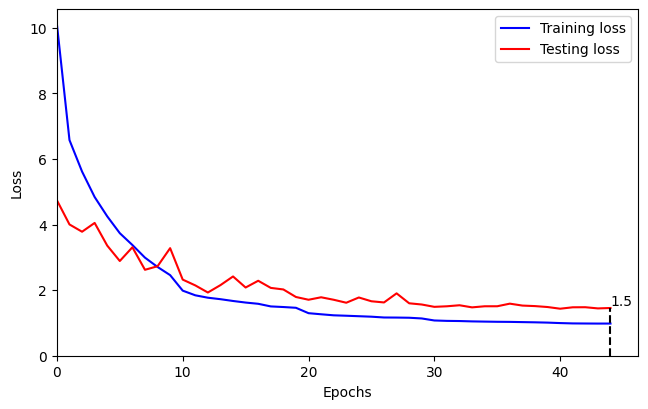

Traing epoch: 45   avg loss is: 0.976420675506111
Testing epoch: 45   avg testing loss is: 1.444410264492035
Testing on epoch: 45 has accuracy: top1: 82.70 top5: 96.10


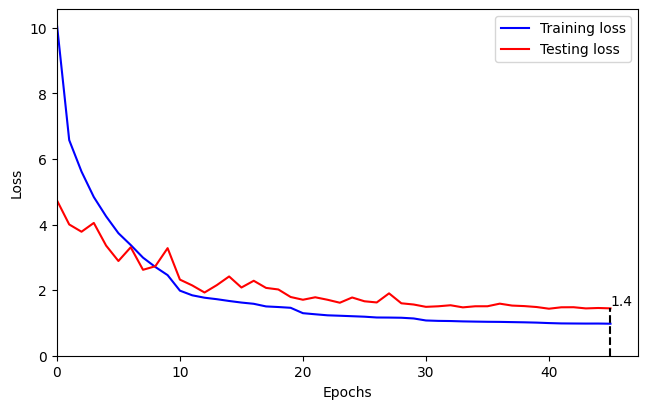

Traing epoch: 46   avg loss is: 0.969603457370726
Testing epoch: 46   avg testing loss is: 1.4596429498767556
Testing on epoch: 46 has accuracy: top1: 82.21 top5: 95.77


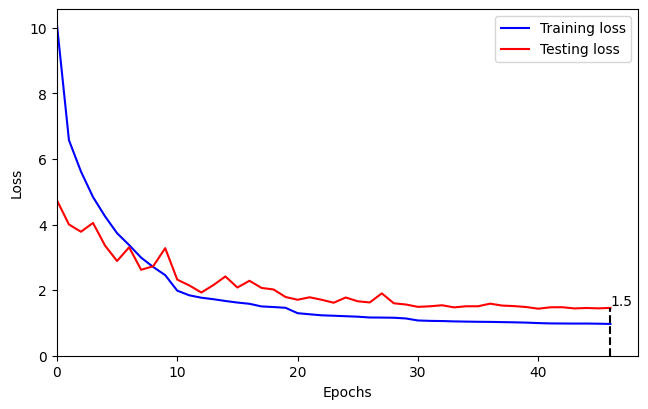

Traing epoch: 47   avg loss is: 0.9712023197435865
Testing epoch: 47   avg testing loss is: 1.4337986466297852
Testing on epoch: 47 has accuracy: top1: 83.13 top5: 96.18


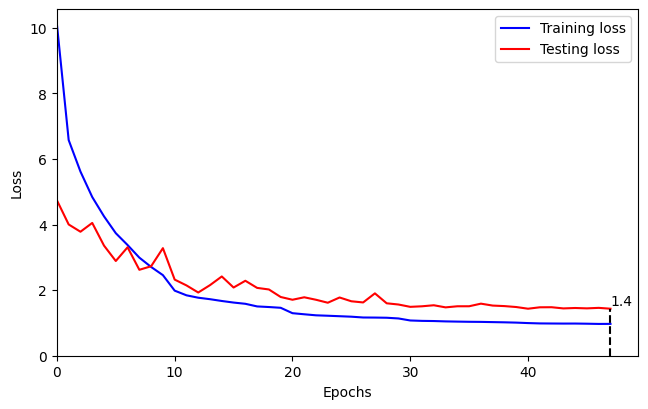

Traing epoch: 48   avg loss is: 0.9650331576999162
Testing epoch: 48   avg testing loss is: 1.4600286446627797
Testing on epoch: 48 has accuracy: top1: 82.13 top5: 96.02


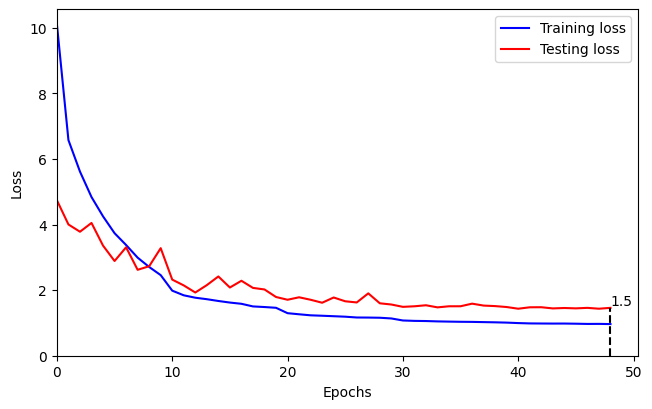

Traing epoch: 49   avg loss is: 0.963183363946546
Testing epoch: 49   avg testing loss is: 1.450556309423714
Testing on epoch: 49 has accuracy: top1: 82.15 top5: 96.12


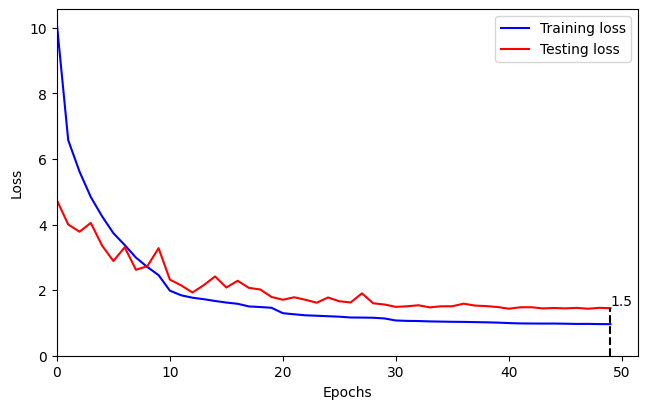

Traing epoch: 50   avg loss is: 0.9561964495509279
Testing epoch: 50   avg testing loss is: 1.4535885492217875
Testing on epoch: 50 has accuracy: top1: 82.00 top5: 95.79


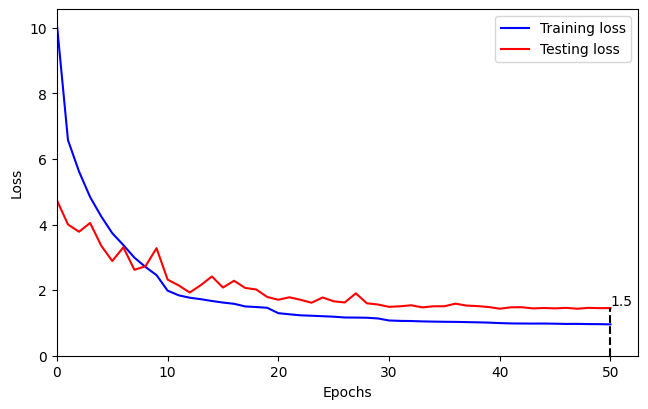

Traing epoch: 51   avg loss is: 0.955020739417784
Testing epoch: 51   avg testing loss is: 1.4196538184290735
Testing on epoch: 51 has accuracy: top1: 83.52 top5: 96.18


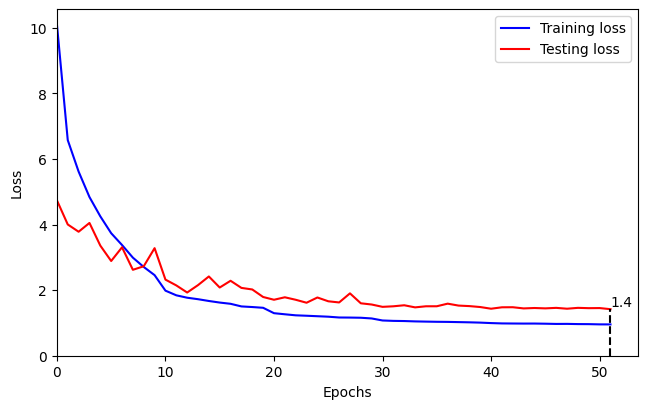

Traing epoch: 52   avg loss is: 0.9532905266064555
Testing epoch: 52   avg testing loss is: 1.4389713155889066
Testing on epoch: 52 has accuracy: top1: 82.76 top5: 95.88


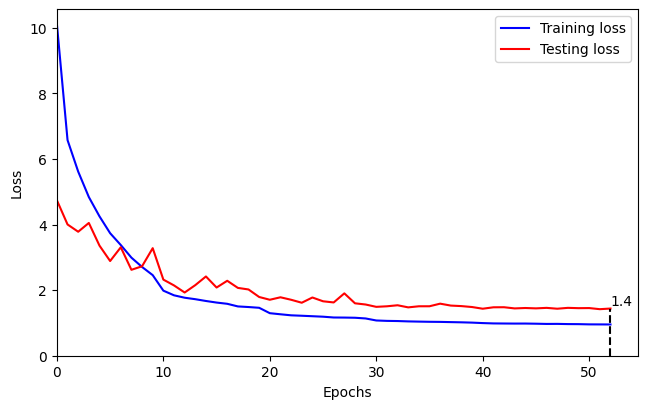

Traing epoch: 53   avg loss is: 0.9528622845975625
Testing epoch: 53   avg testing loss is: 1.427262827986126
Testing on epoch: 53 has accuracy: top1: 83.30 top5: 96.18


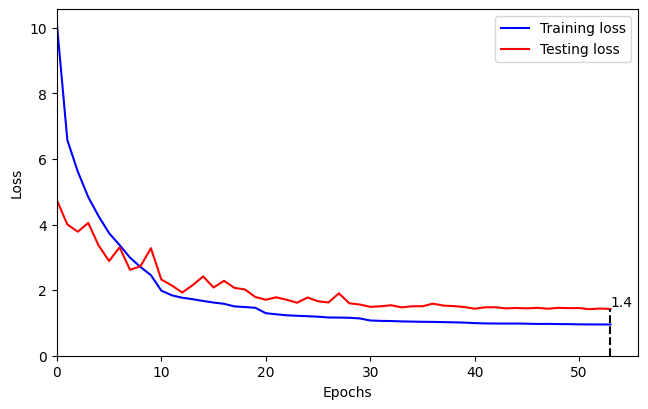

Traing epoch: 54   avg loss is: 0.9485201935808197
Testing epoch: 54   avg testing loss is: 1.4521277108667796
Testing on epoch: 54 has accuracy: top1: 82.21 top5: 95.61


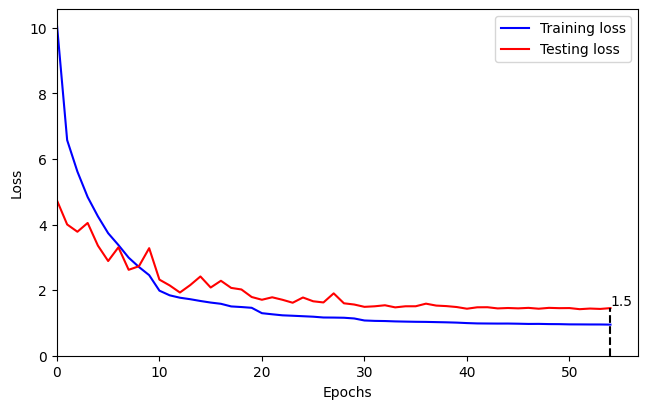

Traing epoch: 55   avg loss is: 0.9496766524154598
Testing epoch: 55   avg testing loss is: 1.4806120378948817
Testing on epoch: 55 has accuracy: top1: 81.45 top5: 95.53


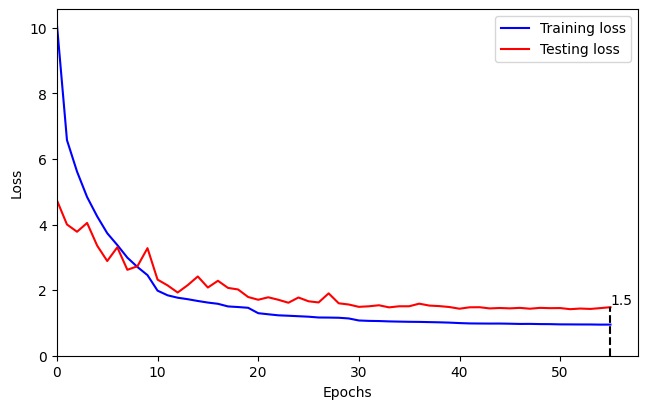

Traing epoch: 56   avg loss is: 0.9455357895177954
Testing epoch: 56   avg testing loss is: 1.4189081167877649
Testing on epoch: 56 has accuracy: top1: 83.48 top5: 96.12


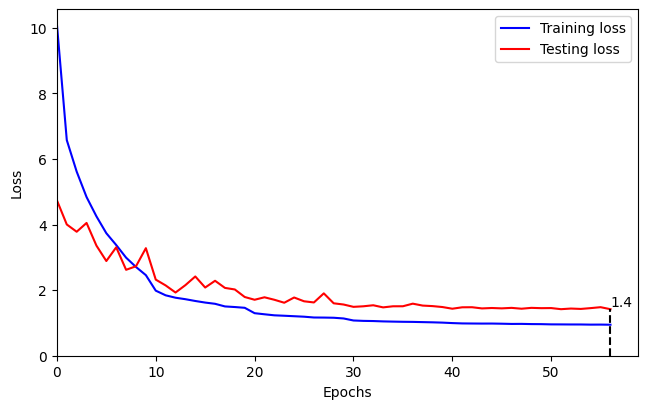

Traing epoch: 57   avg loss is: 0.9449973991271161
Testing epoch: 57   avg testing loss is: 1.4070243063002732
Testing on epoch: 57 has accuracy: top1: 83.79 top5: 96.45


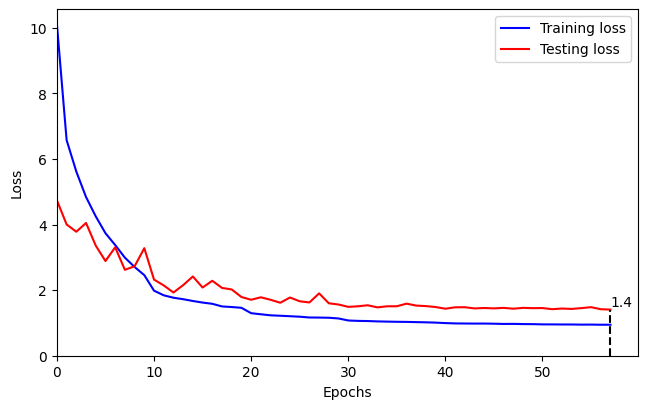

Traing epoch: 58   avg loss is: 0.9453561037194496
Testing epoch: 58   avg testing loss is: 1.4330383190113436
Testing on epoch: 58 has accuracy: top1: 82.93 top5: 96.14


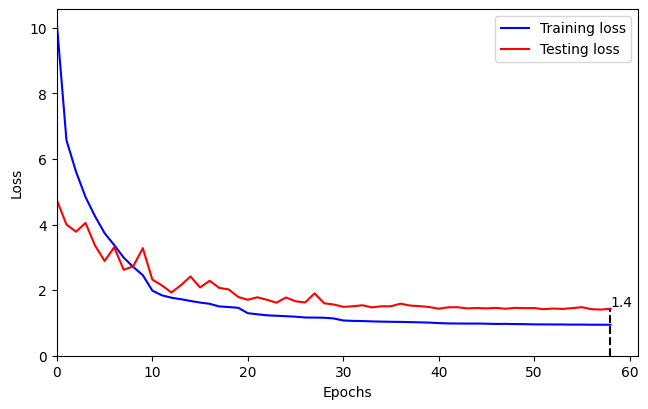

Traing epoch: 59   avg loss is: 0.9449076722649967
Testing epoch: 59   avg testing loss is: 1.4279671162831078
Testing on epoch: 59 has accuracy: top1: 83.15 top5: 95.90


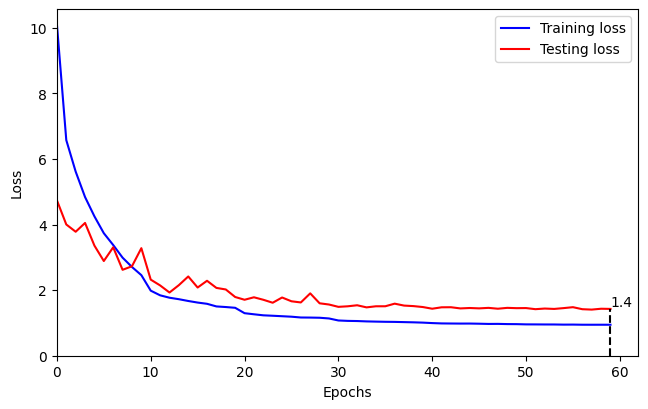

Traing epoch: 60   avg loss is: 0.9410078573961552
Testing epoch: 60   avg testing loss is: 1.455469748684179
Testing on epoch: 60 has accuracy: top1: 82.27 top5: 95.79


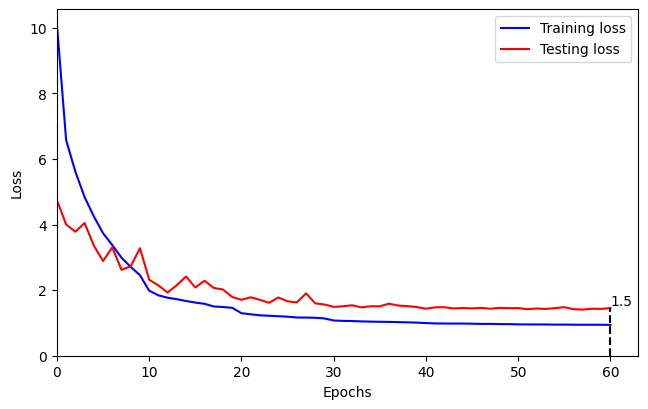

Traing epoch: 61   avg loss is: 0.9373615450885784
Testing epoch: 61   avg testing loss is: 1.420728142944823
Testing on epoch: 61 has accuracy: top1: 83.25 top5: 96.43


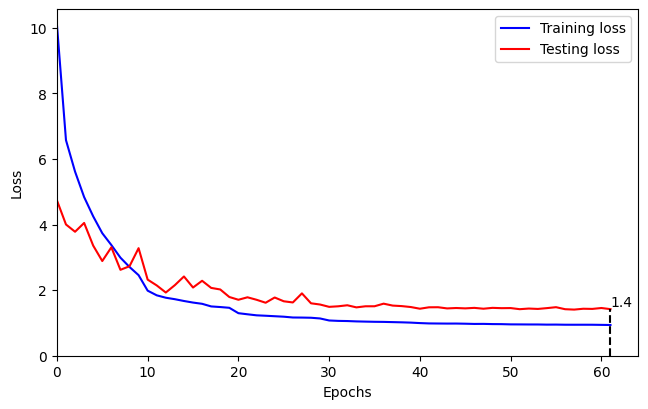

Traing epoch: 62   avg loss is: 0.9362304997043449
Testing epoch: 62   avg testing loss is: 1.4247355329284788
Testing on epoch: 62 has accuracy: top1: 83.19 top5: 96.10


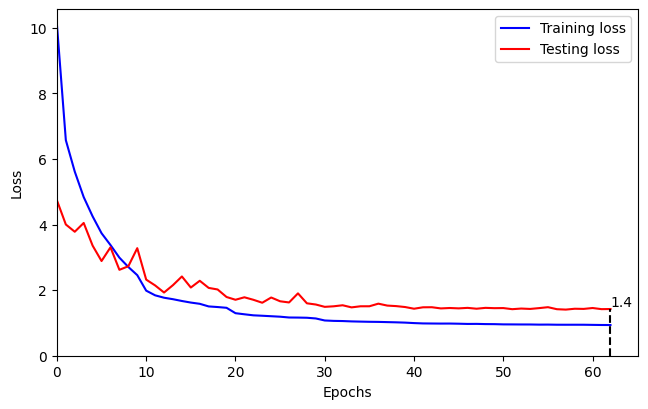

Traing epoch: 63   avg loss is: 0.9410442788393891
Testing epoch: 63   avg testing loss is: 1.4483432457825849
Testing on epoch: 63 has accuracy: top1: 82.31 top5: 95.75


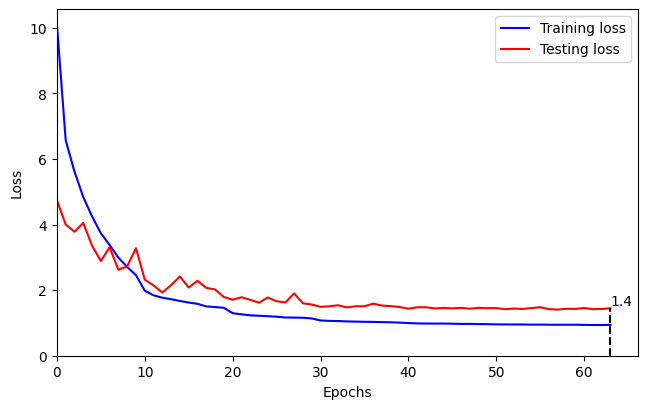

Traing epoch: 64   avg loss is: 0.9332979071040114
Testing epoch: 64   avg testing loss is: 1.4386526468758272
Testing on epoch: 64 has accuracy: top1: 82.91 top5: 95.88


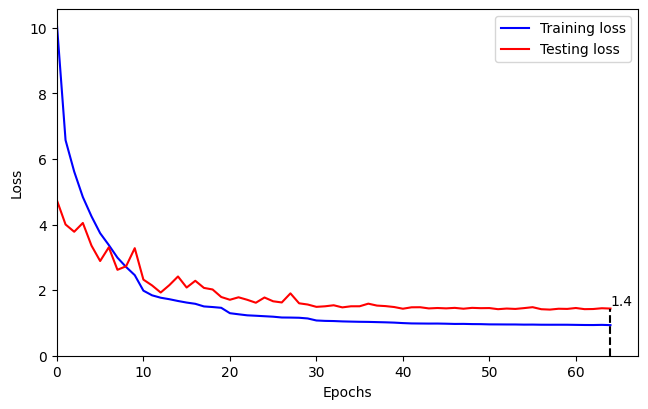

Traing epoch: 65   avg loss is: 0.9364242787454643
Testing epoch: 65   avg testing loss is: 1.4206898814049838
Testing on epoch: 65 has accuracy: top1: 83.42 top5: 96.31


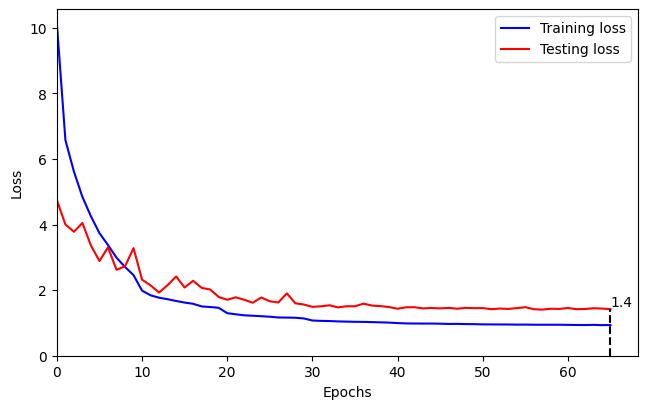

Traing epoch: 66   avg loss is: 0.9359998083582112
Testing epoch: 66   avg testing loss is: 1.4194502882496962
Testing on epoch: 66 has accuracy: top1: 83.34 top5: 96.16


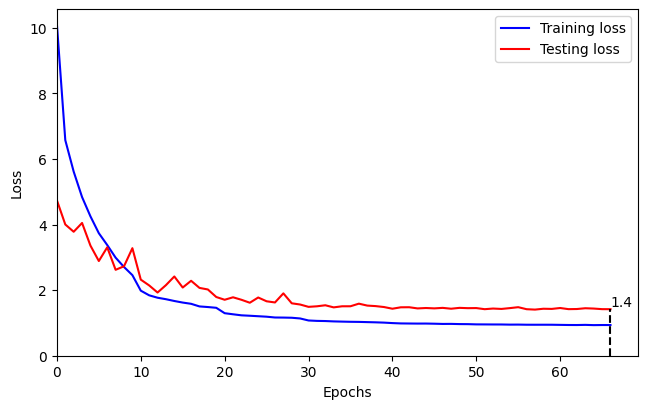

Traing epoch: 67   avg loss is: 0.9361986516236591
Testing epoch: 67   avg testing loss is: 1.431741141827307
Testing on epoch: 67 has accuracy: top1: 82.84 top5: 95.96


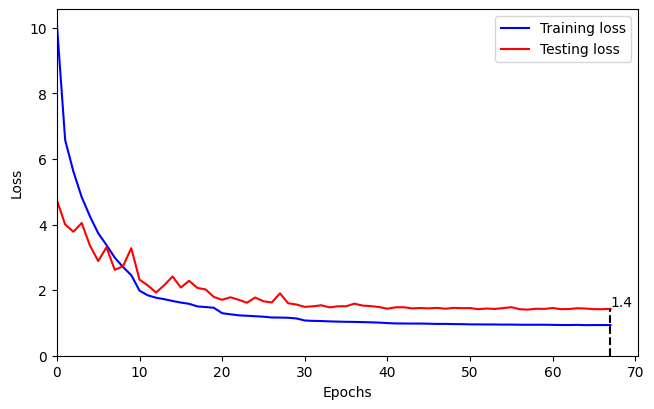

Traing epoch: 68   avg loss is: 0.9344633413630039
Testing epoch: 68   avg testing loss is: 1.3915298761237076
Testing on epoch: 68 has accuracy: top1: 84.32 top5: 96.39


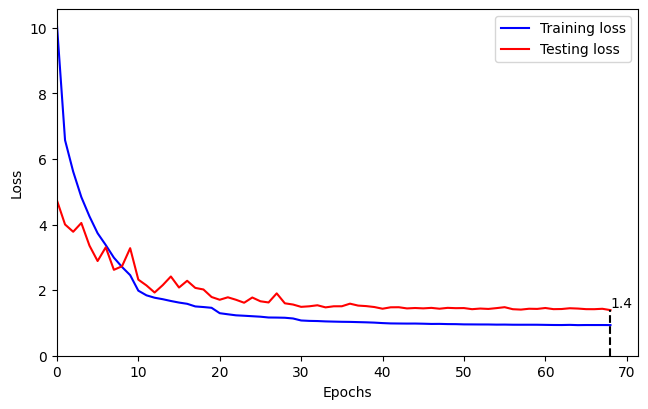

Traing epoch: 69   avg loss is: 0.9360468432682902
Testing epoch: 69   avg testing loss is: 1.4314567266594955
Testing on epoch: 69 has accuracy: top1: 82.66 top5: 96.12


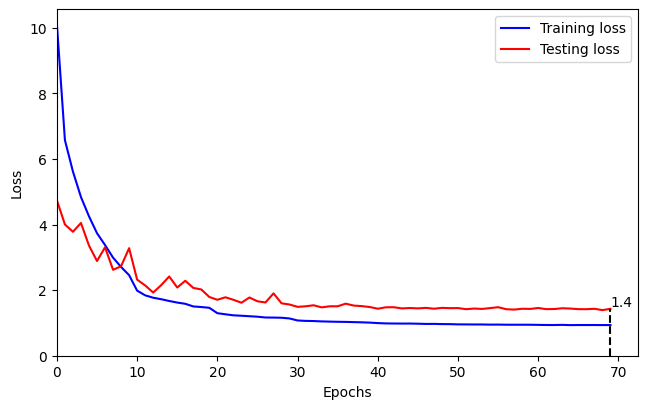

In [3]:
class DeepWriter_Train:
    def __init__(self,dataset='CERUG-EN',imgtype='png'):

        self.dataset = dataset
        self.folder = dataset
        #self.labelfolder = 'dataset/'

        if not os.path.exists(self.folder):
            if dataset == 'CERUG-EN':
                pass
                #download_cerug(dataset)
            elif dataset == 'Firemaker':
                download_firemaker(dataset)
            else:
                print('****** Warning: the dataset %s does not existed!******'%dataset)
                print('Please go to the following website to check how to download the dataset:')
                print('https://www.ai.rug.nl/~sheng/writeridataset.html')
                print('*'*20)
                raise ValueError('Dataset: %s does not existed!'%dataset)

        self.labelfolder = self.folder
        #self.train_folder = self.folder+'/train/'
        self.train_folder = '/kaggle/input/cerug-en/CERUG-EN-train-images/train/'
        #self.test_folder = self.folder+'/test/'
        self.test_folder = '/kaggle/input/cerug-en/CERUG-EN-test-images/test/'

        self.imgtype=imgtype
        self.device = 'cuda'
        self.scale_size=(64,128)

        if self.device == 'cuda':
            torch.backends.cudnn.benchmark = True

        if self.dataset == 'CVL':
            self.imgtype = 'tif'

        self.model_dir = 'model'
        if not os.path.exists(self.model_dir):
            #raise ValueError('Model directory: %s does not existed'%self.model_dir)
            os.mkdir(self.model_dir)#raise ValueError('Model directory: %s does not existed'%self.model_dir)

        basedir = 'GRRNN_WriterIdentification_dataset_'+self.dataset+'_model'
        self.logfile= basedir + '.log'
        self.modelfile = basedir
        self.batch_size = 16

        train_set = DatasetFromFolder(dataset=self.dataset,
        				labelfolder = self.labelfolder,
                        foldername=self.train_folder,
                        imgtype=self.imgtype,
                        scale_size=self.scale_size,
                        is_training = True)

        self.training_data_loader = DataLoader(dataset=train_set, num_workers=0,
                           batch_size=self.batch_size, shuffle=True)

        test_set = DatasetFromFolder(dataset=self.dataset,
        				labelfolder = self.labelfolder,
                        foldername=self.test_folder,imgtype=self.imgtype,
                        scale_size=self.scale_size,
                        is_training = False)

        self.testing_data_loader = DataLoader(dataset=test_set, num_workers=0,
                           batch_size=self.batch_size, shuffle=False)

        num_class = train_set.num_writer
        self.model = GrnnNet(1,num_classes=train_set.num_writer).to(self.device)

        #self.criterion = nn.CrossEntropyLoss()
        self.criterion = LabelSomCE()
        self.optimizer = optim.Adam(self.model.parameters(),lr=0.0001,weight_decay=1e-4)
        self.scheduler = lr_scheduler.StepLR(self.optimizer,step_size=10,gamma=0.5)

    def train(self,epoch):
        self.model.train()
        losstotal = []

        for iteration,batch in enumerate(self.training_data_loader,1):
            inputs = batch[0].to(self.device).float()
            target = batch[1].type(torch.long).to(self.device)


            self.optimizer.zero_grad()

            logits = self.model(inputs)

            train_loss= self.criterion(logits,target)

            losstotal.append(train_loss.item())
            train_loss.backward()
            self.optimizer.step()


        with open(self.logfile,'a') as fp:
            fp.write('Training epoch %d avg loss is: %.6f\n'%(epoch,np.mean(losstotal)))
        print('Traing epoch:',epoch,'  avg loss is:',np.mean(losstotal))
        return np.mean(losstotal)


    def test(self,epoch,during_train=True):
        self.model.eval()
        losstotal = []

        if not during_train:
            self.load_model(epoch)

        top1 = 0
        top5 = 0
        ntotal=0

        for iteration,batch in enumerate(self.testing_data_loader,1):
            inputs = batch[0].to(self.device).float()
            target = batch[1].to(self.device).long()

            logits = self.model(inputs)

            test_loss = self.criterion(logits,target)

            losstotal.append(test_loss.item())

            res = self.accuracy(logits,target,topk=(1,5))
            top1 += res[0]
            top5 += res[1]

            ntotal += inputs.size(0)


        top1 /= float(ntotal)
        top5 /= float(ntotal)

        print('Testing epoch:',epoch,'  avg testing loss is:',np.mean(losstotal))
        print('Testing on epoch: %d has accuracy: top1: %.2f top5: %.2f'%(epoch,top1*100,top5*100))
        with open(self.logfile,'a') as fp:
            fp.write('Testing epoch %d accuracy is: top1: %.2f top5: %.2f\n'%(epoch,top1*100,top5*100))

        return np.mean(losstotal)

    def check_exists(self,epoch):
        model_out_path = self.model_dir + '/' + self.modelfile + '-model_epoch_{}.pth'.format(epoch)
        return os.path.exists(model_out_path)

    def checkpoint(self,epoch):
        model_out_path = self.model_dir + '/' + self.modelfile + '-model_epoch_{}.pth'.format(epoch)
        torch.save(self.model.state_dict(),model_out_path)


    def load_model(self,epoch):
        model_out_path = self.model_dir + '/' + self.modelfile + '-model_epoch_{}.pth'.format(epoch)
        self.model.load_state_dict(torch.load(model_out_path,map_location=self.device))
        print('Load model successful')


    def plot_losses(self, training_losses, testing_losses):
        indices = range(len(training_losses))
        plt.figure(figsize=(7.5, 4.5))
        plt.plot(indices, training_losses, 'b', label='Training loss')
        plt.plot(indices, testing_losses, 'r', label='Testing loss')
        #plt.title('Training and Testing Losses')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.xlim(left=0)
        plt.ylim(bottom=0)

        last_epoch = indices[-1]
        last_test_loss = testing_losses[-1]
        plt.plot([last_epoch, last_epoch], [0, last_test_loss], 'k--')
        plt.text(last_epoch, last_test_loss, f'{last_test_loss:.1f}', color='k', va='bottom', ha='left')

        plt.show()


    def train_loops(self,start_epoch,num_epoch):
        #if self.check_exists(num_epoch): return
        if start_epoch > 0:
            self.load_model(start_epoch-1)

        training_losses = []
        testing_losses = []

        for epoch in range(start_epoch,num_epoch):

            train_loss = self.train(epoch)
            training_losses.append(train_loss)
            self.checkpoint(epoch)
            test_loss = self.test(epoch)
            testing_losses.append(test_loss)
            self.scheduler.step()
            self.plot_losses(training_losses, testing_losses)


    def accuracy(self,output,target,topk=(1,)):
        with torch.no_grad():
            maxk = max(topk)
            _,pred = output.topk(maxk,1,True,True)
            pred = pred.t()
            correct = pred.eq(target.view(1, -1).expand_as(pred))

            res = []
            for k in topk:
                correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
                res.append(correct_k.data.cpu().numpy())

        return res


if __name__ == '__main__':
    mod = DeepWriter_Train(dataset='CERUG-EN')
    mod.train_loops(0,70)